In [189]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [190]:
def read_data():
    df = pd.read_csv('sonar.all-data.csv')
    
    X = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    
    encoder = LabelEncoder()
    encoder.fit(y)
    y =encoder.transform(y)
    
    Y = One_Hot_Encoding(y)
    
    return X,Y

def One_Hot_Encoding(y):
    
    total_rows = len(y)
    
    unique_classes = len(np.unique(y))
    
    One_Hot_Encoding = np.zeros((total_rows,unique_classes))
    
    One_Hot_Encoding[np.arange(total_rows),y]=1
    
    return One_Hot_Encoding
           

In [191]:
X,Y = read_data()

X,Y = shuffle(X,Y, random_state =1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20)

input_size = X.shape[1]
n_classes = Y.shape[1]
learning_rate = 0.1
Epochs = 1000

layer_1_nodes = 100
layer_2_nodes = 100
layer_3_nodes = 100
layer_4_nodes = 100

#placeholders for real input and output data

x = tf.placeholder(tf.float32,[None,input_size])

y_real = tf.placeholder(tf.float32,[None,n_class])

W = tf.Variable(tf.zeros([input_size,n_class]))
b = tf.Variable(tf.zeros([n_class]))

path = 'D:\100DaysOfMLCode\100DaysOfMLCode\Day 1'

In [192]:
def neural_network(x,weights,biases):
    
    hidden_layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    hidden_layer_1 = tf.nn.relu(hidden_layer_1)
    # Hidden layer with sigmoid activations
    hidden_layer_2 = tf.add(tf.matmul(hidden_layer_1, weights['h2']), biases['b2'])
    hidden_layer_2 = tf.nn.sigmoid(hidden_layer_2)
    # Hidden layer with sigmoid activations
    hidden_layer_3 = tf.add(tf.matmul(hidden_layer_2, weights['h3']), biases['b3'])
    hidden_layer_3 = tf.nn.sigmoid(hidden_layer_3)
    # Hidden layer with RELU activations
    hidden_layer_4 = tf.add(tf.matmul(hidden_layer_3, weights['h4']), biases['b4'])
    hidden_layer_4 = tf.nn.relu(hidden_layer_4)
    # Output layer with linear activations
    output_layer = tf.matmul(hidden_layer_4, weights['out']) + biases['out']
    
    return output_layer

# define the weights and the biases for each layer

weights = {
    'h1': tf.Variable(tf.truncated_normal([input_size, layer_1_nodes])),
    'h2': tf.Variable(tf.truncated_normal([layer_1_nodes, layer_2_nodes])),
    'h3': tf.Variable(tf.truncated_normal([layer_2_nodes, layer_3_nodes])),
    'h4': tf.Variable(tf.truncated_normal([layer_3_nodes, layer_4_nodes])),
    'out': tf.Variable(tf.truncated_normal([layer_4_nodes, n_classes])),
    }
biases = {
    'b1': tf.Variable(tf.truncated_normal([layer_1_nodes])),
    'b2': tf.Variable(tf.truncated_normal([layer_2_nodes])),
    'b3': tf.Variable(tf.truncated_normal([layer_3_nodes])),
    'b4': tf.Variable(tf.truncated_normal([layer_4_nodes])),
    'out': tf.Variable(tf.truncated_normal([n_classes])),
    }
    

    

In [193]:
init = tf.global_variables_initializer()

saver = tf.train.Saver()
sess = tf.Session()
sess.run(init)
accuracy_history = []
cost_history = np.empty(shape=[1], dtype=float)

model_y = neural_network(x,weights,biases)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model_y, labels=y_real))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

completed:  0 eopch out of:  1000 cost is:  110.659 accuracy:  0.515152
completed:  1 eopch out of:  1000 cost is:  2.17116 accuracy:  0.551515
completed:  2 eopch out of:  1000 cost is:  32.3568 accuracy:  0.515152
completed:  3 eopch out of:  1000 cost is:  14.3041 accuracy:  0.484848
completed:  4 eopch out of:  1000 cost is:  20.9853 accuracy:  0.515152
completed:  5 eopch out of:  1000 cost is:  4.10241 accuracy:  0.484848
completed:  6 eopch out of:  1000 cost is:  13.8601 accuracy:  0.515152
completed:  7 eopch out of:  1000 cost is:  1.2479 accuracy:  0.654545
completed:  8 eopch out of:  1000 cost is:  4.19249 accuracy:  0.533333
completed:  9 eopch out of:  1000 cost is:  5.00144 accuracy:  0.484848
completed:  10 eopch out of:  1000 cost is:  4.22481 accuracy:  0.527273
completed:  11 eopch out of:  1000 cost is:  2.13101 accuracy:  0.545455
completed:  12 eopch out of:  1000 cost is:  2.52174 accuracy:  0.575758
completed:  13 eopch out of:  1000 cost is:  1.48314 accuracy:

completed:  116 eopch out of:  1000 cost is:  0.0188171 accuracy:  1.0
completed:  117 eopch out of:  1000 cost is:  0.0186489 accuracy:  1.0
completed:  118 eopch out of:  1000 cost is:  0.0184781 accuracy:  1.0
completed:  119 eopch out of:  1000 cost is:  0.0183243 accuracy:  1.0
completed:  120 eopch out of:  1000 cost is:  0.0181591 accuracy:  1.0
completed:  121 eopch out of:  1000 cost is:  0.0179975 accuracy:  1.0
completed:  122 eopch out of:  1000 cost is:  0.0178471 accuracy:  1.0
completed:  123 eopch out of:  1000 cost is:  0.0176859 accuracy:  1.0
completed:  124 eopch out of:  1000 cost is:  0.0175366 accuracy:  1.0
completed:  125 eopch out of:  1000 cost is:  0.0173911 accuracy:  1.0
completed:  126 eopch out of:  1000 cost is:  0.0172478 accuracy:  1.0
completed:  127 eopch out of:  1000 cost is:  0.0171005 accuracy:  1.0
completed:  128 eopch out of:  1000 cost is:  0.0169715 accuracy:  1.0
completed:  129 eopch out of:  1000 cost is:  0.0168283 accuracy:  1.0
comple

completed:  232 eopch out of:  1000 cost is:  0.00909065 accuracy:  1.0
completed:  233 eopch out of:  1000 cost is:  0.00905138 accuracy:  1.0
completed:  234 eopch out of:  1000 cost is:  0.00901252 accuracy:  1.0
completed:  235 eopch out of:  1000 cost is:  0.00897457 accuracy:  1.0
completed:  236 eopch out of:  1000 cost is:  0.00893326 accuracy:  1.0
completed:  237 eopch out of:  1000 cost is:  0.00889729 accuracy:  1.0
completed:  238 eopch out of:  1000 cost is:  0.00885815 accuracy:  1.0
completed:  239 eopch out of:  1000 cost is:  0.00881969 accuracy:  1.0
completed:  240 eopch out of:  1000 cost is:  0.00878376 accuracy:  1.0
completed:  241 eopch out of:  1000 cost is:  0.00874697 accuracy:  1.0
completed:  242 eopch out of:  1000 cost is:  0.00870699 accuracy:  1.0
completed:  243 eopch out of:  1000 cost is:  0.00867152 accuracy:  1.0
completed:  244 eopch out of:  1000 cost is:  0.00863672 accuracy:  1.0
completed:  245 eopch out of:  1000 cost is:  0.00860006 accurac

completed:  346 eopch out of:  1000 cost is:  0.00601511 accuracy:  1.0
completed:  347 eopch out of:  1000 cost is:  0.00599459 accuracy:  1.0
completed:  348 eopch out of:  1000 cost is:  0.00597581 accuracy:  1.0
completed:  349 eopch out of:  1000 cost is:  0.00595593 accuracy:  1.0
completed:  350 eopch out of:  1000 cost is:  0.00593926 accuracy:  1.0
completed:  351 eopch out of:  1000 cost is:  0.00592262 accuracy:  1.0
completed:  352 eopch out of:  1000 cost is:  0.00590187 accuracy:  1.0
completed:  353 eopch out of:  1000 cost is:  0.00588328 accuracy:  1.0
completed:  354 eopch out of:  1000 cost is:  0.00586476 accuracy:  1.0
completed:  355 eopch out of:  1000 cost is:  0.0058476 accuracy:  1.0
completed:  356 eopch out of:  1000 cost is:  0.00583044 accuracy:  1.0
completed:  357 eopch out of:  1000 cost is:  0.00581064 accuracy:  1.0
completed:  358 eopch out of:  1000 cost is:  0.00579346 accuracy:  1.0
completed:  359 eopch out of:  1000 cost is:  0.00577698 accuracy

completed:  460 eopch out of:  1000 cost is:  0.00434288 accuracy:  1.0
completed:  461 eopch out of:  1000 cost is:  0.00433089 accuracy:  1.0
completed:  462 eopch out of:  1000 cost is:  0.00431928 accuracy:  1.0
completed:  463 eopch out of:  1000 cost is:  0.00430763 accuracy:  1.0
completed:  464 eopch out of:  1000 cost is:  0.00429601 accuracy:  1.0
completed:  465 eopch out of:  1000 cost is:  0.00428397 accuracy:  1.0
completed:  466 eopch out of:  1000 cost is:  0.0042727 accuracy:  1.0
completed:  467 eopch out of:  1000 cost is:  0.00426123 accuracy:  1.0
completed:  468 eopch out of:  1000 cost is:  0.00424962 accuracy:  1.0
completed:  469 eopch out of:  1000 cost is:  0.00423839 accuracy:  1.0
completed:  470 eopch out of:  1000 cost is:  0.00422727 accuracy:  1.0
completed:  471 eopch out of:  1000 cost is:  0.00421599 accuracy:  1.0
completed:  472 eopch out of:  1000 cost is:  0.0042051 accuracy:  1.0
completed:  473 eopch out of:  1000 cost is:  0.00419403 accuracy:

completed:  574 eopch out of:  1000 cost is:  0.003318 accuracy:  1.0
completed:  575 eopch out of:  1000 cost is:  0.00331093 accuracy:  1.0
completed:  576 eopch out of:  1000 cost is:  0.00330378 accuracy:  1.0
completed:  577 eopch out of:  1000 cost is:  0.00329678 accuracy:  1.0
completed:  578 eopch out of:  1000 cost is:  0.00329081 accuracy:  1.0
completed:  579 eopch out of:  1000 cost is:  0.00328352 accuracy:  1.0
completed:  580 eopch out of:  1000 cost is:  0.003277 accuracy:  1.0
completed:  581 eopch out of:  1000 cost is:  0.00327028 accuracy:  1.0
completed:  582 eopch out of:  1000 cost is:  0.00326335 accuracy:  1.0
completed:  583 eopch out of:  1000 cost is:  0.00325692 accuracy:  1.0
completed:  584 eopch out of:  1000 cost is:  0.00325061 accuracy:  1.0
completed:  585 eopch out of:  1000 cost is:  0.00324398 accuracy:  1.0
completed:  586 eopch out of:  1000 cost is:  0.00323765 accuracy:  1.0
completed:  587 eopch out of:  1000 cost is:  0.00323108 accuracy:  

completed:  688 eopch out of:  1000 cost is:  0.00268261 accuracy:  1.0
completed:  689 eopch out of:  1000 cost is:  0.00267779 accuracy:  1.0
completed:  690 eopch out of:  1000 cost is:  0.00267332 accuracy:  1.0
completed:  691 eopch out of:  1000 cost is:  0.00266868 accuracy:  1.0
completed:  692 eopch out of:  1000 cost is:  0.00266413 accuracy:  1.0
completed:  693 eopch out of:  1000 cost is:  0.00265961 accuracy:  1.0
completed:  694 eopch out of:  1000 cost is:  0.00265508 accuracy:  1.0
completed:  695 eopch out of:  1000 cost is:  0.00265052 accuracy:  1.0
completed:  696 eopch out of:  1000 cost is:  0.00264669 accuracy:  1.0
completed:  697 eopch out of:  1000 cost is:  0.00264152 accuracy:  1.0
completed:  698 eopch out of:  1000 cost is:  0.00263727 accuracy:  1.0
completed:  699 eopch out of:  1000 cost is:  0.00263315 accuracy:  1.0
completed:  700 eopch out of:  1000 cost is:  0.00262881 accuracy:  1.0
completed:  701 eopch out of:  1000 cost is:  0.00262398 accurac

completed:  802 eopch out of:  1000 cost is:  0.00223933 accuracy:  1.0
completed:  803 eopch out of:  1000 cost is:  0.002236 accuracy:  1.0
completed:  804 eopch out of:  1000 cost is:  0.00223267 accuracy:  1.0
completed:  805 eopch out of:  1000 cost is:  0.00222966 accuracy:  1.0
completed:  806 eopch out of:  1000 cost is:  0.00222606 accuracy:  1.0
completed:  807 eopch out of:  1000 cost is:  0.00222297 accuracy:  1.0
completed:  808 eopch out of:  1000 cost is:  0.0022196 accuracy:  1.0
completed:  809 eopch out of:  1000 cost is:  0.00221642 accuracy:  1.0
completed:  810 eopch out of:  1000 cost is:  0.00221315 accuracy:  1.0
completed:  811 eopch out of:  1000 cost is:  0.00221004 accuracy:  1.0
completed:  812 eopch out of:  1000 cost is:  0.00220655 accuracy:  1.0
completed:  813 eopch out of:  1000 cost is:  0.00220353 accuracy:  1.0
completed:  814 eopch out of:  1000 cost is:  0.00220021 accuracy:  1.0
completed:  815 eopch out of:  1000 cost is:  0.00219739 accuracy: 

completed:  916 eopch out of:  1000 cost is:  0.0019123 accuracy:  1.0
completed:  917 eopch out of:  1000 cost is:  0.00190982 accuracy:  1.0
completed:  918 eopch out of:  1000 cost is:  0.00190748 accuracy:  1.0
completed:  919 eopch out of:  1000 cost is:  0.00190483 accuracy:  1.0
completed:  920 eopch out of:  1000 cost is:  0.00190251 accuracy:  1.0
completed:  921 eopch out of:  1000 cost is:  0.00189998 accuracy:  1.0
completed:  922 eopch out of:  1000 cost is:  0.00189759 accuracy:  1.0
completed:  923 eopch out of:  1000 cost is:  0.00189515 accuracy:  1.0
completed:  924 eopch out of:  1000 cost is:  0.00189301 accuracy:  1.0
completed:  925 eopch out of:  1000 cost is:  0.00189028 accuracy:  1.0
completed:  926 eopch out of:  1000 cost is:  0.00188788 accuracy:  1.0
completed:  927 eopch out of:  1000 cost is:  0.00188562 accuracy:  1.0
completed:  928 eopch out of:  1000 cost is:  0.00188335 accuracy:  1.0
completed:  929 eopch out of:  1000 cost is:  0.00188071 accuracy

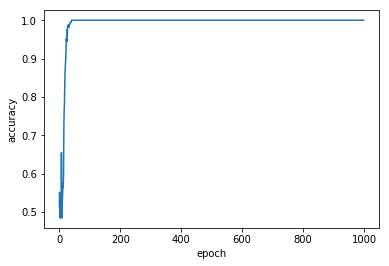

Test Accuracy:  [[ -2.68770266   1.98424363]
 [ -7.33081532  -4.44236803]
 [  2.17173505  -5.51470137]
 [ -0.84493256  -6.73402643]
 [  3.12037563   7.88127947]
 [  2.9271276   -1.58246231]
 [  4.94409418   3.51394987]
 [ -5.32394886 -14.60020638]
 [  4.39448166   4.17043018]
 [  4.6297102    1.13263774]
 [  4.5630374    9.20730782]
 [  0.34237763  -9.98029327]
 [ -5.46096611  -0.55461764]
 [ -5.07483578 -13.21443176]
 [ -0.72319007  -0.38177371]
 [ -0.71746826  -1.90172756]
 [ -6.47757435 -13.49308968]
 [  0.82056212  -3.56152439]
 [ -1.90950346   3.99654436]
 [  0.55698109  -9.88228798]
 [ -1.42322922   0.4671104 ]
 [ -4.743155   -13.20091057]
 [ -3.6617012   -8.16549015]
 [  3.63706064  10.03058815]
 [ -2.88914967  -6.27416992]
 [ -7.42037535 -16.57135582]
 [ -9.81765652   6.37245369]
 [  6.70728254  -2.9488945 ]
 [  0.21241471   9.16832733]
 [ -6.72227764 -14.07907867]
 [ -0.46286872  -7.48261404]
 [ -6.27405024  -8.17767239]
 [ -1.7109791   -4.32881975]
 [ -6.87039232  -0.55542469

In [194]:
for epoch in range(Epochs):
    
    train_run = sess.run(optimizer, feed_dict={x:x_train, y_real:y_train})    
    
    cost = sess.run(loss,feed_dict={x:x_train, y_real:y_train})
    
    correct_prediction = tf.equal(tf.argmax(model_y,1),tf.argmax(y_real,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))   
    accuracy = (sess.run(accuracy,feed_dict={x:x_train, y_real:y_train}))
    accuracy_history.append(accuracy)
    
    print('completed: ',epoch,'eopch out of: ',Epochs, 'cost is: ', cost,'accuracy: ', accuracy)
    
save_path = saver.save(sess, path)
print("Model saved in file: %s", save_path)

plt.plot(accuracy_history)
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

print("Test Accuracy: ", (sess.run(model_y, feed_dict={x:x_test, y_real:y_test} )))